# <div align="center"> MAE 598 Homework 2
<div align="center"> Aaron Dao

# Theory/Computation Problems

### Problem 1 (20 points) 
**a.** Show that the stationary point (zero gradient) of the function
$$
    f=2x_{1}^{2} - 4x_1 x_2+ 1.5x^{2}_{2}+ x_2
$$
is a saddle (with indefinite Hessian). 

**b.** Find the directions of downslopes away from the saddle. Hint: Use Taylor's expansion at the saddle point. Find directions that reduce $f$.

#### Solution.
##### A.
The gradient is $$ g= \begin{bmatrix} \frac{\partial f}{\partial x_1} \\ \frac{\partial f}{\partial x_2}  \end{bmatrix}$$ 

$$ g= \begin{bmatrix} 4x_1-4x_2 \\ -4x_1+3x_2+1 \end{bmatrix}$$
To find the stationary point, solve: $$\left[\begin{array}{cc|c} 4 & -4 & 0 \\ -4 & 3 & -1 \end{array}\right]$$ which gives $(x_1, x_2)=(1,1)$.

The Hessian is 


In [7]:
import numpy as np
from numpy import linalg as LA
H= np.array([[4, -4],[-4, 3]])
print(H)

[[ 4 -4]
 [-4  3]]


And the eigenvalues are given by:

In [13]:
w, v = LA.eig(H)
print(w)

[ 7.53112887 -0.53112887]


Thus, since $\lambda_1\gt0$ and $\lambda_2\lt0$, the Hessian is **indefinite**.  

##### B. 
The Taylor's Expansion at the saddle is given as $$f(x)= 0.5 + (0) + \frac{1}{2}\begin{bmatrix} (x_1-1) & (x_2-1) \end{bmatrix}\begin{bmatrix}4 & -4 \\\ -4 & 3\end{bmatrix}\begin{bmatrix}(x_1-1) \\\ (x_2-1) \end{bmatrix}$$ 
where 
$$\begin{bmatrix} (x_1-1) & (x_2-1) \end{bmatrix}\begin{bmatrix}4 & -4 \\\ -4 & 3\end{bmatrix}\begin{bmatrix}(x_1-1) \\\ (x_2-1) \end{bmatrix} = 4x_1^2-8x_1x_2+3x_2^2+2x_2-1$$ must be $\lt0$.
In other words, $$4x_1^2-8x_1x_2+3x_2^2+2x_2-1=(2x_1-3x_2+1)(2x_1-x_2-1)\lt0$$ Thus the directions of downslopes are $$\bigg\{ \begin{bmatrix}x_1 \\\ x_2 \end{bmatrix} \forall x_1, x_2: 2x_1-3x_2\lt-1 \bigcup 2x_1-x_2\lt1 \bigg\}$$


### Problem 2 (50 points) 

**Part 1.** (10 points) Find the point in the plane $x_1+2x_2+3x_3=1$ in $\mathbb{R}^3$ that is nearest to the point $(-1,0,1)^T$. Is this a convex problem? Hint: Convert the problem into an unconstrained problem using $x_1+2x_2+3x_3=1$.

**Solution.** We are looking for a point $x\in\mathbb{R}^3$ closest to (or, with the smallest distance to) the point $\begin{bmatrix}-1 & 0& 1\end{bmatrix}^T$, which also satisfies the plane definition $\begin{bmatrix}1&2&3\end{bmatrix}x=1$. We use the definition of the plane to substitute $1-2x_2-3x_3$ for $x_1$ and receive $$\min_{x_2,x_3}\quad(2-2x_2-3x_3)^2+x_2^2+(x_3-1)^2$$ The gradient is $$\begin{bmatrix} 10x_2+6x_3-8 \\ 12x_2 +20x_3-14\end{bmatrix}$$ which, after solving the system of equations, has a stationary point at $(x_2, x_3)=(-0.1429, 0.7857)$ and thus the full stationary point is $$\begin{bmatrix}x_1\\x_2\\x_3\end{bmatrix}=\begin{bmatrix}-1.0714\\-0.1429\\0.7857\end{bmatrix}$$ 

The Hessian at this point is constant, and is $$\begin{bmatrix} 10 &12\\12&10\end{bmatrix}$$ which is positive definite. Thus the stationary point is a local minimum.

As an optimization problem.
$$ \min_{x} \Bigg\| x-\begin{bmatrix}-1\\0\\1\end{bmatrix} \Bigg\|^2$$ subject to $$\begin{bmatrix}1&2&3\end{bmatrix}x=1$$ Yes, this is convex because the constraint is linear, and the objective function is the squared norm of a linear function, all of which (square, norm, and linear operators) are convex.


**Part 2.** (40 points) Implement the gradient descent and Newton's algorithm for solving the problem. Attach your codes along with a short summary including (1) the initial points tested, (2) corresponding solutions, (3) a log-linear convergence plot.

#### Gradient Descent.
<br>
For this algorithm, the intial points $x_0$ tested were $\begin{bmatrix}1&0&0\end{bmatrix}^T$ and $\begin{bmatrix}-6&-1&3\end{bmatrix}^T$. These produced the solutions $x=\begin{bmatrix}-1.0715 &-0.1425 & 0.7855\end{bmatrix}^T$ and $x=\begin{bmatrix}-1.0714& -0.1431&  0.7859\end{bmatrix}^T$, respectively. The log-linear covergence plots are shown below.  

x0 =[1 0 0]
Optimal x is [-1.07151005 -0.14254115  0.78553079]


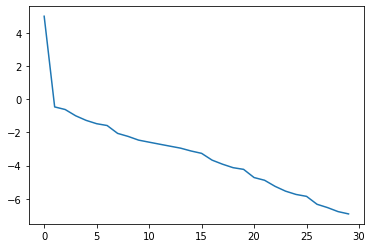

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import math

objfun= lambda x: ((1-2*x[0]-3*x[1])+1)**2 + (x[0])**2 + (x[1]-1)**2
grad = lambda x: np.array([10*x[0]+12*x[1]-8, 12*x[0]+20*x[1]-14]) # Note that x2 is x[0] and x3 is x[1]
f_true=objfun(np.array([-.1429,.7857]))

# AMIJO line search!
def amijo(x):
    a=1 # initiate
    while objfun(x-a*grad(x)) > objfun(x)-a*(.5)*np.matmul(grad(x),grad(x)):
        a=.5*a
    return a

# our function!
def grad_descent(x0):
    print('x0 ='+str(np.array([(1-2*x0[0]-3*x0[1]), x0[0],x0[1]]))) # just so we know what we're doing.
    x_solve_grad = [x0]
    x= x_solve_grad[0]
    a=.01
    e=10 # Initialize!
    f_grad_diff=[objfun(x0)]

    while e > .001:
        a=amijo(x)
        x= x - a*grad(x)
        x_solve_grad.append(x)
        f_grad_diff.append(math.log(abs(objfun(x)-f_true),10))
        e = np.linalg.norm(grad(x))
        #print(e)

    plt.plot(f_grad_diff)
    print('Optimal x is '+str(np.array([(1-2*x[0]-3*x[1]), x[0],x[1]])))
    
#%% Time to run.
x0 = np.array([0, 0]).T # Initial guess.
grad_descent(x0)

x0 =[-6 -1  3]
Optimal x is [-1.07147219 -0.14316159  0.78593179]


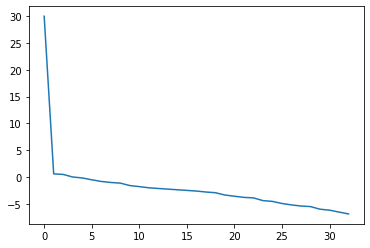

In [20]:
x0 = np.array([-1, 3]).T # Initial guess.
grad_descent(x0)

#### Newton's Algorithm.
For Newton's algorithm, the intial points $x_0$ tested were $\begin{bmatrix}-1&1&0\end{bmatrix}^T$ and $\begin{bmatrix}-5&0&2\end{bmatrix}^T$. These produced the solutions $x=\begin{bmatrix}-1.0713&-0.1428& 0.7857\end{bmatrix}^T$ and $x=\begin{bmatrix}-1.0715 &-0.1430& 0.7859\end{bmatrix}^T$, respectively. The log-linear covergence plots are shown below.  

x0 =[-1  1  0]
Optimal x is [-1.0713042  -0.14287628  0.78568559]


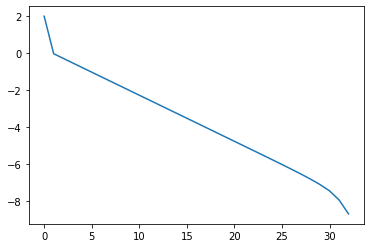

In [29]:
# Let's use another AMIJO line search
def amijo_newton(x):
    a=1 # initiate
    while objfun(x-a*grad(x)) > objfun(x)-a*(.5)*np.matmul(grad(x),np.matmul(np.linalg.inv(H),grad(x))):
        a=.5*a
    return a

# Newton setup.

def newton_method(x0):
    print('x0 ='+str(np.array([(1-2*x0[0]-3*x0[1]), x0[0],x0[1]])))
    x_solve_newton = [x0]
    x= x_solve_newton[0]
    e=10 # Initialize!
    f_newton_diff=[objfun(x0)]
    H=np.array([[10, 12],[12,20]])

    while e > .001:
        a=amijo_newton(x)
        x= x - a*grad(x)
        f_newton_diff.append(math.log(abs(objfun(x)-f_true),10))
        x_solve_newton.append(x)
        e = np.linalg.norm(grad(x))
        #print(e)
    
    plt.plot(f_newton_diff)
    print('Optimal x is '+str(np.array([(1-2*x[0]-3*x[1]), x[0],x[1]])))

x0 = np.array([1, 0]) # Initial guess.
newton_method(x0)

x0 =[-5  0  2]
Optimal x is [-1.07151548 -0.14302779  0.78585702]


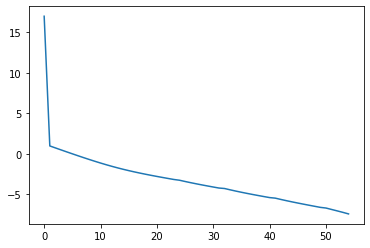

In [28]:
x0 = np.array([0, 2])
newton_method(x0)

### Problem 3 (10 points) 
Let $f(x)$ and $g(x)$ be two convex functions defined on the convex set $\mathcal{X}$. 

**(5 points) Prove that $af(x)+bg(x)$ is convex for $a>0$ and $b>0$.** 
Define $$F(\lambda x_1+(1-\lambda)\ x_2\ )\le\ \lambda F(x_1\ )+(1-\lambda)F(x_2\ )$$
Thus the inequaltiy that *must be true* if $F(x)$ is convex is $$F(\lambda x_1+(1-\lambda)\ x_2\ )\le\ \lambda F(x_1\ )+(1-\lambda)F(x_2\ )$$
Now, expanding yields
$$af\left(\lambda x_1+\left(1-\lambda\right)x_2\right)+bg\left(\lambda x_1+\left(1-\lambda\right)x_2\right)\le\lambda\left(af\left(x_1\right)+bg\left(x_1\right)\right)+\left(1-\lambda\right)\left(af\left(x_2\right)+bg\left(x_2\right)\right)$$
$$af\left(\lambda x_1+\left(1-\lambda\right)x_2\right)+bg\left(\lambda x_1+\left(1-\lambda\right)x_2\right)\le a\lambda f\left(x_1\right)+b\lambda g\left(x_1\right)+a\left(1-\lambda\right)f\left(x_2\right)+b\left(1-\lambda\right)g\left(x_2\right)$$
$$af\left(\lambda x_1+\left(1-\lambda\right)x_2\right)+bg\left(\lambda x_1+\left(1-\lambda\right)x_2\right)\le a\left(\lambda f\left(x_1\right)+\left(1-\lambda\right)f\left(x_2\right)\right)+b\left(\lambda g\left(x_1\right)+\left(1-\lambda\right)g\left(x_2\right)\right)$$
<br>
Given that $f(x),g(x)$ are convex, we also have that $$f\left(\lambda x_1+\left(1-\lambda\right)x_2\right)\le\ \lambda f\left(x_1\right)+\left(1-\lambda\right)f\left(x_2\right)$$ $$g\left(\lambda x_1+\left(1-\lambda\right)x_2\right)\le\ \lambda g\left(x_1\right)+\left(1-\lambda\right)g\left(x_2\right)$$
<br> Thus, the original inequality holds true if $a\ge0, b\ge0$.


**(5 points) In what conditions will $f(g(x))$ be convex?**
In other words, under which conditions will the following be true: $$f(g(λx_1+(1-λ) x_2 ))≤λf(g(x_1 ))+(1-λ)f(g(x_2))$$
If $g(x)$ is convex, we know that $$g(λx_1+(1-λ) x_2 )≤ λg(x_1 )+(1-λ)g(x_2 )$$ and, we can say that $$f(g(λx_1+(1-λ) x_2 ))≤f(λg(x_1 )+(1-λ)g(x_2 ))$$ *only if $f(x)$ is* ***nondecreasing*** (because a larger argument in $f(x)$ will yield a greater-than-or-equal-to output). <br>This allows us to apply the convexity of $f(x)$ and claim that $$f(λg(x_1 )+(1-λ)g(x_2 ))≤ λf(g(x_1 ))+(1-λ)f(g(x_2 ))$$
When we combine the previous inequalities, we yield $$f(g(λx_1+(1-λ) x_2 ))≤f(λg(x_1 )+(1-λ)g(x_2 ))≤ λf(g(x_1 ))+(1-λ)f(g(x_2 ))$$ or, $$f(g(λx_1+(1-λ) x_2 ))≤ λf(g(x_1 ))+(1-λ)f(g(x_2 ))$$ <br> Hence, $f(g(x))$ will be convex when $f(x)$ is **nondecreasing**.


### Problem 4 (bonus 10 points)
Show that $f({\bf x}_1) \geq f(\textbf{x}_0) + 
    \textbf{g}_{\textbf{x}_0}^T(\textbf{x}_1-\textbf{x}_0)$ for a convex function $f(\textbf{x}): \mathcal{X} \rightarrow \mathbb{R}$ and for $\textbf{x}_0$, $\textbf{x}_1 \in \mathcal{X}$. 

# Design Problems

### Problem 5 (20 points) 
Consider an illumination problem: There are $n$ lamps and $m$ mirrors fixed to the ground. The target reflection intensity level is $I_t$. The actual reflection intensity level on the $k$th mirror can be computed as $\textbf{a}_k^T \textbf{p}$, where $\textbf{a}_k$ is given by the distances between all lamps to the mirror, and $\textbf{p}:=[p_1,...,p_n]^T$ are the power output of the lamps. The objective is to keep the actual intensity levels as close to the target as possible by tuning the power output $\textbf{p}$. <br> So $a_k$ is a $n * 1$ vector.

#### A. 
**(5 points) Formulate this problem as an optimization problem.<br>**
The intensity of the reflection can be expressed as $$I_k=\textbf{a}_{k}^T\textbf{p}$$ and the corresponding objective function is $$\min_{\textbf{p}} \sum_{k=1}^n(I_k-I_t)^2$$
This is under the physical constraint of maximum power $p_{max}$ $$0\le p_j \le p_{max}\quad \forall j=1...m$$

#### B.
**(5 points) Is your problem convex?<br>**
The *objective function* is comprised of a summation of a quadratic operator on the linear function $I_k-I_t = \textbf{a}_k^T\textbf{p}-I_t$. Therefore, since the summation, quadratic operator, and linear function are all convex, the resulting objective function is also convex. <br>

The objective function is $$\sum_{k=1}^n(a_k^T p-I_t )^2 =\sum_{k=1}^n(a_k^T p)^2-2I_t a_k^T p+I_t^2 $$ We use the Hessian to determine if it is convex (PSD Hessian). $$H_k=\frac{\partial^2}{∂p^2} ((a_k^T p)^2-2I_t a_k^T p+I_t^2 )=2a_k a_k^T∈\mathbb{R}^{n×n}$$ 
Hence $$H=\sum H_k$$ Now, we left and right multiply by a unit vector $d\in \mathbb{R}^{n}$ and yield $$d^THd=\sum2d^Ta_ka_k^Td$$
If we say $d^Ta_k=a_k^Td=b_k$, we can write $$d^THd=\sum2b_k^2\geq0$$  Note that $ d^THd\geq\lambda_{min}$ where $\lambda_{min}$ is the smallest eigenvalue of $H$. Thus, since $\sum2b_k^2\geq0$, $H$ is positive semidefinite. 

The *constraint* on power is the intersection of half-spaces that create a hypercube, which in turn is convex. Hence the problem is convex.  

#### C.
**(5 points) If we require the overall power output of any of the $n$ lamps to be less than $p^*$, will the problem have a unique solution?**<br>
The new constraint that $\sum_i p_i<p^*$ is a linear (and thus convex) constraint. If the objective function is *strictly convex*, this will have a unique solution.

The condition $\sum2b_k^2>0 $ for $H$ to be positive definite indicates that $ \left[\begin{matrix}a_1^T\\\vdots\\a_m^T\\\end{matrix}\right]\in\mathbb{R}^{m\times n}$ must have a trivial null space, such that no $d$ causes $a_k^Td\ \forall\ k=1\ldots m  $ to go to zero. In other words, assuming that $a_k$ are linearly independent, there must be more mirrors $m$ than lamps $n$ for $H$ to be positive definite, the objective function to be strictly convex, and the problem to have a unique solution.



#### D.
**(5 points) If we require no more than half of the lamps to be switched on, will the problem have a unique solution?** <br> No, it will not, as the solution space is made of several intersecting line segments, and is no longer convex. The problem is now np-hard.

# Note

For this homework, you may want to attach sketches as means to explain your ideas. Here is how you can attach images.

![batman](batman.jpg)